In [1]:
from mqt.yaqs.core.data_structures.networks import MPS, MPO
from mqt.yaqs import simulator
from mqt.yaqs.core.data_structures.simulation_parameters import AnalogSimParams, Observable
from mqt.yaqs.core.libraries.gate_library import X, Z, RuntimeCost
from mqt.yaqs.core.data_structures.noise_model import NoiseModel

import matplotlib.pyplot as plt
import numpy as np
import pickle

C:\Users\Aaron\AppData\Local\Temp\ipykernel_2680\701031846.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


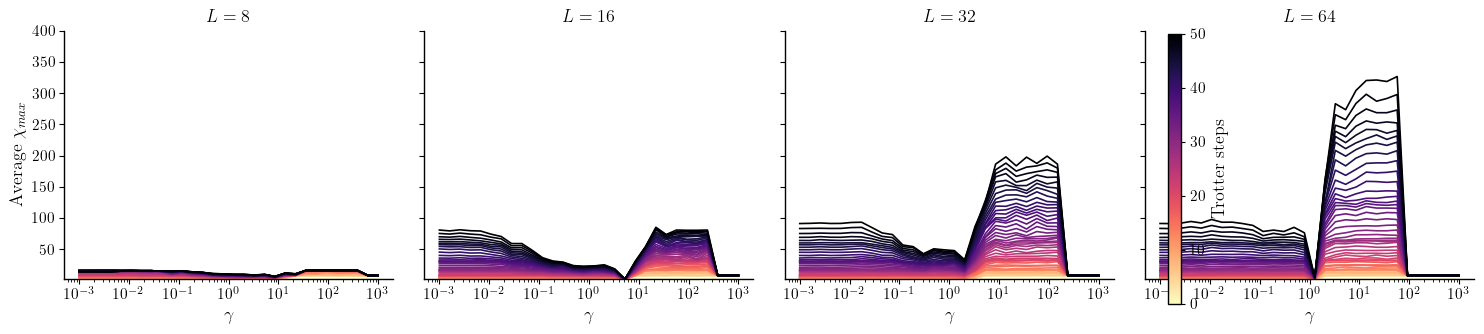

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pickle
from scipy.interpolate import make_interp_spline

# ----- Global plot style -----
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 13,
    "font.size": 12,
    "axes.titlesize": 13,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "axes.linewidth": 1.0,
    "legend.fontsize": 11,
    "figure.figsize": (15, 3.5)  # 5 plots side-by-side
})

system_sizes = [8, 16, 32, 64]
gammas = np.logspace(-3, 3, 30)

fig, axes = plt.subplots(1, len(system_sizes), sharey=True)

for idx, L in enumerate(system_sizes):
    ax = axes[idx]
    filename = f"results_{L}.pickle"
    
    with open(filename, 'rb') as f:
        results = pickle.load(f)
    results = np.array(results).T
    num_curves = len(results)

    # Set colormap
    cmap = plt.get_cmap('magma_r')
    norm = mcolors.Normalize(vmin=0, vmax=num_curves - 1)
    colors = cmap(np.linspace(0, 1, num_curves))

    # Plot each curve
    for j in range(num_curves):
        x = np.array(gammas)
        y = results[j]
        ax.plot(x, y, color=colors[j], lw=1.2)

    ax.set_xscale('log')
    ax.set_ylim(2, 350)
    ax.set_title(f'$L = {L}$')
    if idx == 0:
        ax.set_ylabel('Average $\\chi_{max}$')
    ax.set_xlabel('$\\gamma$')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Add a shared colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), pad=0.02)
cbar.set_label('Trotter steps', labelpad=5)
cbar.ax.tick_params(direction='out', length=3)

plt.tight_layout()
plt.show()

In [3]:
# t1_list = []
# t2_list = []
# t3_list = []
# t4_list = []
# t5_list = []
# for j in range(len(results)):
#     t1_list.append(results[j][9])
#     t2_list.append(results[j][19])
#     t3_list.append(results[j][29])
#     t4_list.append(results[j][39])
#     t5_list.append(results[j][49])

# plt.plot(gammas, t1_list, label='T=1')
# plt.plot(gammas, t2_list, label='T=2')
# plt.plot(gammas, t3_list, label='T=3')
# plt.plot(gammas, t4_list, label='T=4')
# plt.plot(gammas, t5_list, label='T=5')
# plt.legend()
# plt.xscale('log')

In [4]:
filename = "results_no_noise.pickle"
with open(filename, 'rb') as f:
    results = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'results_no_noise.pickle'

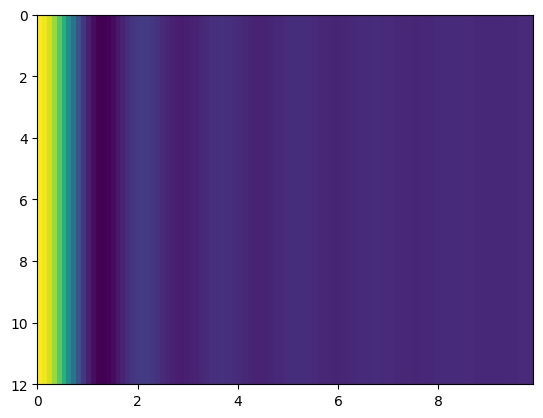

In [ ]:
heatmap = [observable.results for observable in results['exp_vals'][0::-2]]

fig, ax = plt.subplots(1, 1)
im = plt.imshow(heatmap, aspect="auto", extent=(0, 9.9, L, 0))

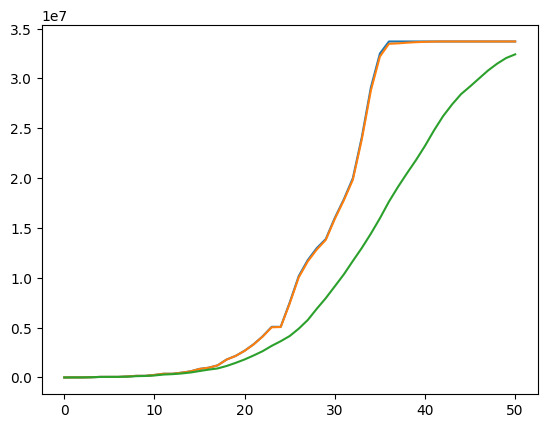

In [ ]:
filename = "results_gamma_0.pickle"
with open(filename, 'rb') as f:
    results = pickle.load(f)
plt.plot(results['exp_vals'][-1].results)

filename = "results_gamma_1.pickle"
with open(filename, 'rb') as f:
    results = pickle.load(f)
plt.plot(results['exp_vals'][-1].results)

filename = "results_gamma_2.pickle"
with open(filename, 'rb') as f:
    results = pickle.load(f)
plt.plot(results['exp_vals'][-1].results)